# Table of Contents
01. Importing Libraries
02. Importing Data
03. Department/Product Popularity
04. Loyalty Status and Ordering Habits
05. Regions
06. Profile Distributions

# 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 02. Importing Data

In [2]:
# Create path
path = r'C:\Users\erj03\OneDrive\Documents\Achievment 4- Instacart Basket Analysis'

In [3]:
# Import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final2_dataframe.pkl'))

In [4]:
# View dataframe
df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Age,date_joined,n_dependants,marital_status,income,merge_indicator,region,user_activity,age_income_loc,family_status
0,2539329,1,1,2,8,NaN,196,1,0,both,...,31,2/17/2019,3,married,40423,both,South,high activity,low income adult,"married, parent"
1,2398795,1,2,3,7,15.0,196,1,1,both,...,31,2/17/2019,3,married,40423,both,South,high activity,low income adult,"married, parent"
2,473747,1,3,3,12,21.0,196,1,1,both,...,31,2/17/2019,3,married,40423,both,South,high activity,low income adult,"married, parent"
3,2254736,1,4,4,7,29.0,196,1,1,both,...,31,2/17/2019,3,married,40423,both,South,high activity,low income adult,"married, parent"
4,431534,1,5,4,15,28.0,196,1,1,both,...,31,2/17/2019,3,married,40423,both,South,high activity,low income adult,"married, parent"


In [5]:
# Create list of columns
df.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'marital_status', 'income',
       'merge_indicator', 'region', 'user_activity', 'age_income_loc',
       'family_status'],
      dtype='object')

# 03. Department/Product Popularity

Text(0, 0.5, 'Count')

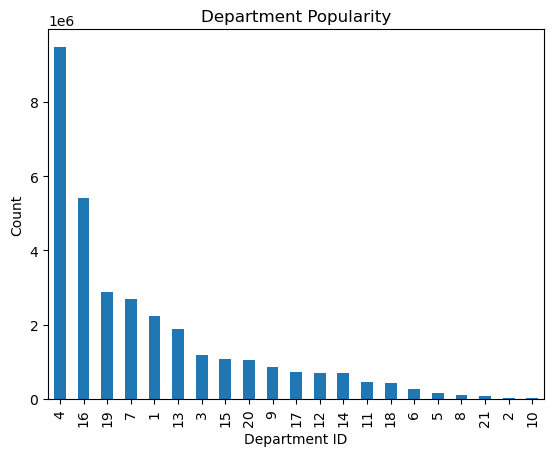

In [6]:
# Create bar chart from department_id column
bar = df['department_id'].value_counts().plot.bar()
plt.title('Department Popularity')
plt.xlabel('Department ID')
plt.ylabel('Count')

In [7]:
# Export chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department.png'))

In [8]:
# View value counts for departments
dept_counts = df['department_id'].value_counts()

In [9]:
# Normalize department counts
dept_norm = dept_counts / len(df)

In [10]:
print(dept_norm)

department_id
4     0.292527
16    0.166603
19    0.089109
7     0.082954
1     0.068963
13    0.057873
3     0.036181
15    0.032960
20    0.032441
9     0.026744
17    0.022795
12    0.021877
14    0.021695
11    0.013812
18    0.013078
6     0.008309
5     0.004743
8     0.003015
21    0.002134
2     0.001120
10    0.001067
Name: count, dtype: float64


In [11]:
# Create dataframe containing value counts for products
prod_counts = df['product_name'].value_counts()

In [12]:
# Create dataframe to find top 10 most popular product
top_10_prods = prod_counts.head(10)

In [13]:
# View top 10 departments
top_10_prods

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64

# 04. Loyalty Status and Ordering Habits

In [14]:
# Create dataframe of loyalty flag value counts
loyalty = df['loyalty_flag'].value_counts()

In [15]:
# Calculate normalization of loyalty flag
loyalty_norm = loyalty / len(df)

In [16]:
display(loyalty_norm)

loyalty_flag
Regular customer    0.489950
Loyal customer      0.317363
New customer        0.192687
Name: count, dtype: float64

In [17]:
# Multiple by 100 to find percentages
loyalty_norm * 100

loyalty_flag
Regular customer    48.995047
Loyal customer      31.736268
New customer        19.268684
Name: count, dtype: float64

In [18]:
# Calculate how many days on average the different loyalty groups in between orders
df.groupby('loyalty_flag').agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.026656
New customer,17.976936
Regular customer,12.155135


In [19]:
# Calculate the average price each loyalty group spends per product
df.groupby('loyalty_flag').agg({'prices':['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,7.773575
New customer,7.801206
Regular customer,7.798262


# 05. Regions

In [20]:
# Create dataframe where customers are grouped by region
region = df.groupby('region')

In [21]:
# Transpose data to create bar chart
transposed_df = region['orders_day_of_week'].value_counts().unstack()

Text(0, 0.5, 'Day of Week')

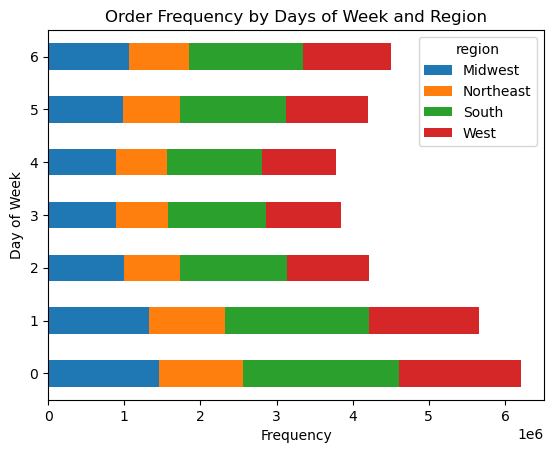

In [22]:
# Create bar chart
stacked_bar = transposed_df.T.plot(kind='barh', stacked=True)
plt.title('Order Frequency by Days of Week and Region')
plt.xlabel('Frequency')
plt.ylabel('Day of Week')

In [23]:
# Export bar chart
stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regiondow.png'))

In [24]:
# Crosstab Regions with Order Frequency
crosstab = pd.crosstab(df['region'], df['order_frequency'], normalize='index')

In [25]:
# Multiply by 100 to retrieve percentages and view
crosstab * 100

order_frequency,Frequent customer,Non-frequent customer,Regular customer,nan
region,,,,
Midwest,66.045733,11.364776,22.589490,0.000000
Northeast,66.481592,11.011901,22.506507,0.000000
South,66.646114,11.259275,22.094565,0.000046
West,66.866805,11.187239,21.945956,0.000000


Text(0, 0.5, 'Region')

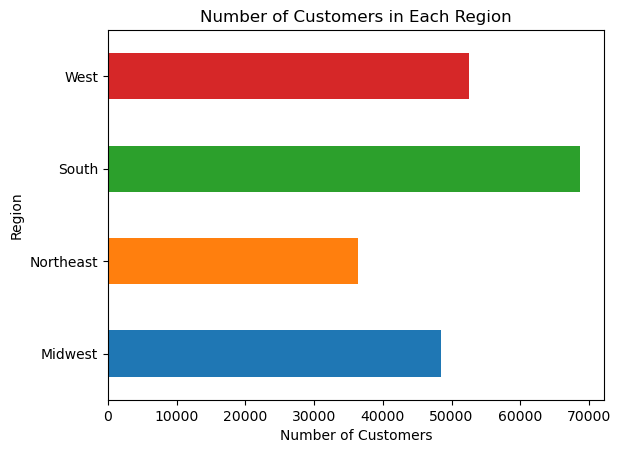

In [26]:
# Create bar chart to show how many customers are in each region
bar_chart = region['user_id'].nunique().plot.barh(color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Number of Customers in Each Region')
plt.xlabel('Number of Customers')
plt.ylabel('Region')

In [27]:
# Export bar chart
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unique_user_region.png'))

# 06. Profile Distributions

In [52]:
# Break down age/income profile into percentages
df['age_income_loc'].value_counts() / len(df)

age_income_loc
middle income adult          0.430474
middle income senior         0.204522
middle income young adult    0.154200
low income adult             0.063569
high income adult            0.053384
high income senior           0.036086
low income young adult       0.032133
low income senior            0.024016
high income young adult      0.001615
Name: count, dtype: float64

Text(0, 0.5, 'Age/Income')

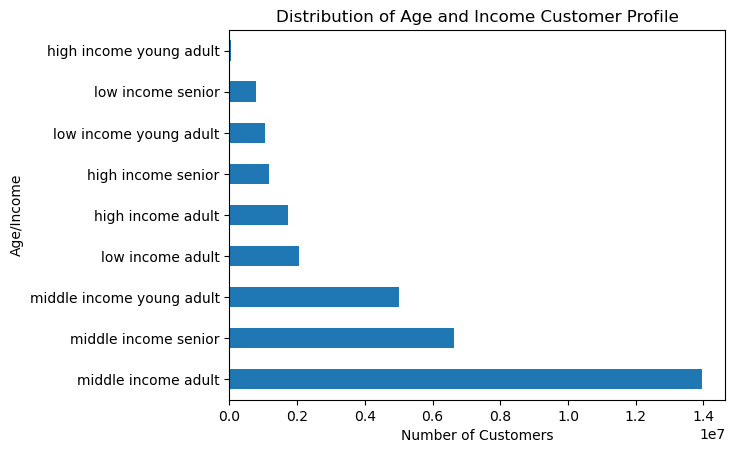

In [40]:
# Create bar chart to show age/income distribution
age_income_bar = df['age_income_loc'].value_counts().plot(kind='barh')
plt.title('Distribution of Age and Income Customer Profile')
plt.xlabel('Number of Customers')
plt.ylabel('Age/Income')

In [41]:
# Export chart
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_dist.png'))

In [53]:
# Break down family status profiles into percentages
df['family_status'].value_counts() / len(df)

family_status
married, parent         0.702264
unmarried, childfree    0.249885
unmarried, parent       0.047851
Name: count, dtype: float64

Text(0, 0.5, 'Family Status')

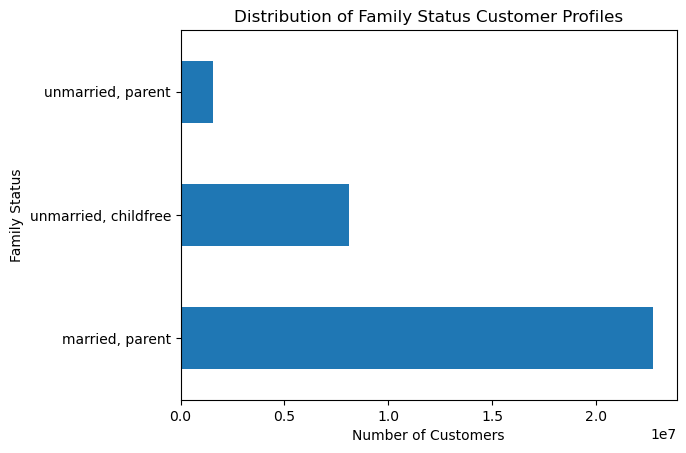

In [42]:
# Create bar chart to show family status distribution
family_bar = df['family_status'].value_counts().plot(kind='barh')
plt.title('Distribution of Family Status Customer Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')

In [43]:
# Export chart
family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_dist.png'))

In [60]:
# Crosstab age/income with order frequency
freq = pd.crosstab(df['age_income_loc'], df['order_frequency'], normalize='index')

Text(0, 0.5, 'Age/Income')

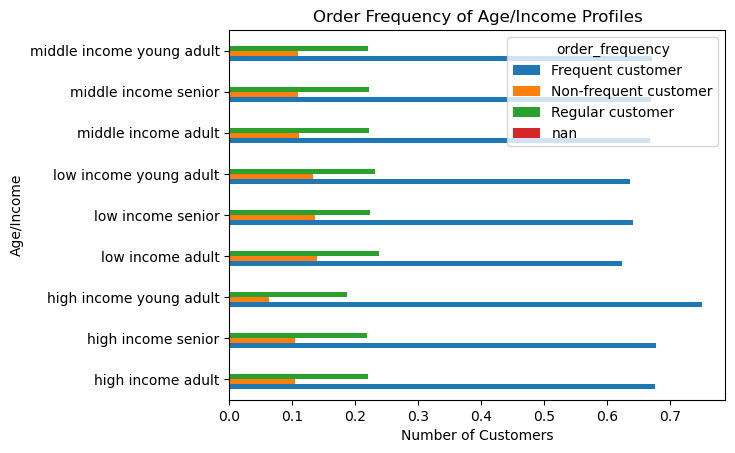

In [64]:
# Create bar chart of crosstab
bar_freq = freq.plot(kind='barh')
plt.title('Order Frequency of Age/Income Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Age/Income')

In [74]:
# Export chart
bar_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_freq.png'))

In [62]:
# Create crosstab of family and order frequency
fam_freq = pd.crosstab(df['family_status'], df['order_frequency'])

Text(0, 0.5, 'Family Status')

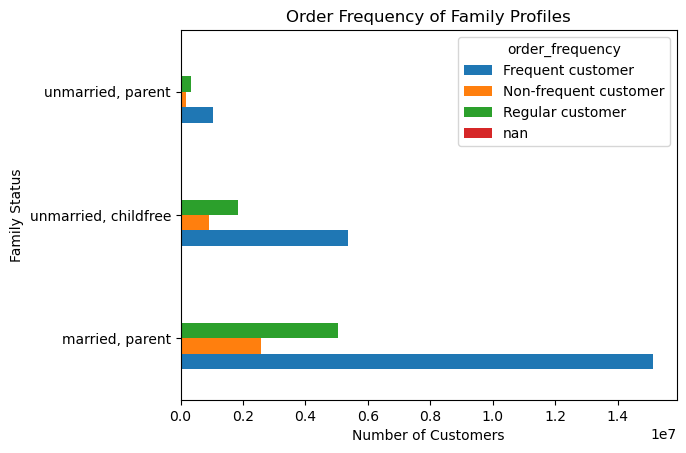

In [65]:
# Create bar chart from crosstab
fam_freq_bar = fam_freq.plot(kind='barh')
plt.title('Order Frequency of Family Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')

In [76]:
# Export chart
fam_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_freq.png'))

In [66]:
# Create crosstab of age/income and loyalty flag
loyal = pd.crosstab(df['age_income_loc'], df['loyalty_flag'])

Text(0, 0.5, 'Age/Income')

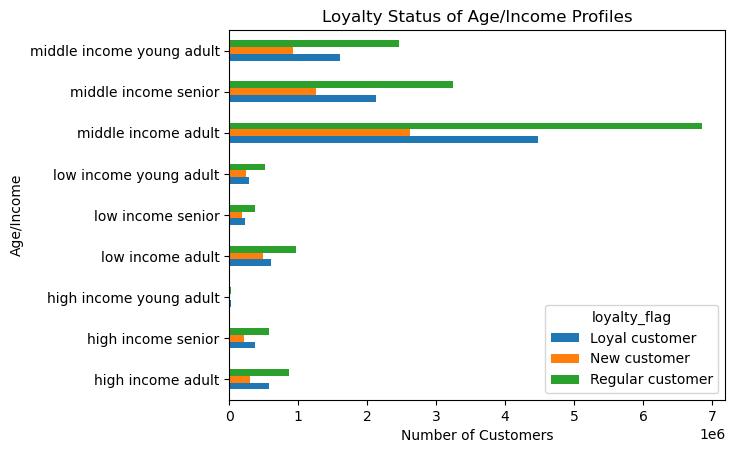

In [69]:
# Create bar chart from crosstab
loyal_bar = loyal.plot(kind='barh')
plt.title('Loyalty Status of Age/Income Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Age/Income')

In [77]:
# Export chart
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_loyal.png'))

In [71]:
# Create crosstab of family status and loyalty flag
fam_loyal = pd.crosstab(df['family_status'], df['loyalty_flag'])

Text(0, 0.5, 'Family Status')

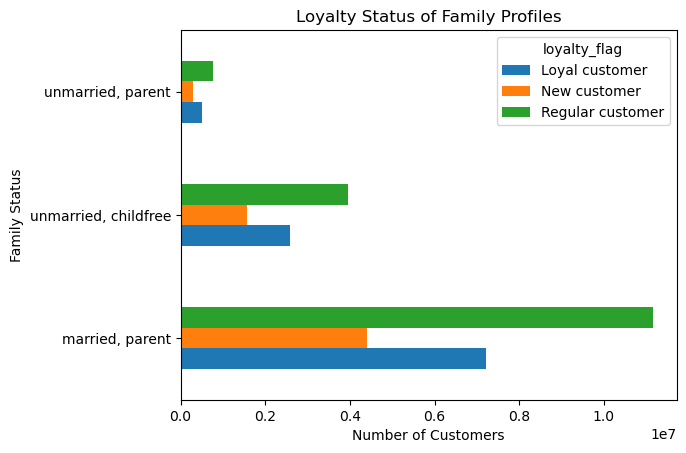

In [73]:
# Create bar chart from crosstab
fam_loyal_bar = fam_loyal.plot(kind='barh')
plt.title('Loyalty Status of Family Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')

In [78]:
# Export chart
fam_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_loyal.png'))